<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/polyhedron-gdl/unibo-intensive-program-2024/blob/main/1-notebooks/chapter-02-01.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Clustering Techniques


<center>
    
<img src="./pics/ch-02-01-00.jpg" width="500" height="500">
</center>

## Introduction

**The Problem**

- In the context of unsupervised learning, the clustering problem involves grouping a set of data points into subsets, or "clusters," where points within the same cluster are more similar to each other than to those in other clusters. 

- The goal is to identify inherent patterns or structures within the data **without any prior knowledge of group labels**.

- Clustering is widely used in various applications like market segmentation, social network analysis, organizing large data libraries, and anomaly detection in diverse fields ranging from bioinformatics to finance. 

- This task distinguishes itself from other machine learning paradigms by its lack of reliance on pre-assigned labels or categories. The algorithms must discern patterns and categorizations solely based on the inherent attributes present within the data.

**Key aspects**

1. **Objective**: The primary objective is to partition the data into clusters such that the points within each cluster are more similar to each other than to points in other clusters. However, the definition of ***"similarity"*** can vary depending on the specific clustering algorithm and the nature of the data.

2. **Unlabeled Data**: Unlike supervised learning, where the algorithm is provided with labeled examples to learn from, in unsupervised learning, the data is unlabeled. This means that the algorithm must discover patterns or structures solely based on the inherent properties of the data itself.

3. **Algorithm Selection**: There are various clustering algorithms available, each with its own approach to defining and identifying clusters. Common algorithms include K-means, hierarchical clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), Gaussian Mixture Models (GMM), and more. The choice of algorithm depends on factors such as the nature of the data, the desired number of clusters, and computational considerations.

4. **Evaluation**: Evaluating the quality of clustering results can be challenging in unsupervised learning since there are no ground truth labels to compare against. However, there are several metrics and techniques, such as silhouette score, Davies-Bouldin index, and visual inspection, that can help assess the effectiveness of clustering algorithms.

**Similarity**

- A fundamental aspect of the clustering problem is the establishment of a criterion for **similarity**. 

- The efficacy of clustering largely hinges on the appropriateness of the chosen similarity or distance metric (such as Euclidean or Manhattan distances). -

- These metrics are pivotal in assessing the likeness between data points, thereby guiding their aggregation into cohesive groups.

<center>
    
<img src="./pics/ch-02-01-01.jpg" width="400" height="400">
</center>

**Cluster Morphology**

An intriguing facet of clustering is the diversity in the morphology of clusters. They can vary widely in shape, size, and distribution, presenting a significant analytical challenge, especially in datasets with complex structures or overlapping cluster boundaries. Another critical consideration is the determination of the optimal number of clusters, a parameter that significantly influences the outcome of the clustering process. Some algorithms demand a pre-specified number of clusters, while others are capable of autonomously ascertaining this number.

**Applications**

The clustering problem manifests in various practical applications, each highlighting its versatility and significance. In the commercial sector, clustering is instrumental in customer segmentation, enabling businesses to categorize customers based on purchasing patterns, demographics, or preferences, thereby enhancing marketing strategies and product development. In the domain of image processing, clustering facilitates image segmentation, a process where pixels with similar features are grouped, aiding in tasks such as object recognition and medical imaging.

**Challenges and Difficulties**

- Although the clustering problem has numerous applications, it is not without its difficulties. 

- Firstly, the definition of a cluster is not fixed universally but varies significantly depending on the context. Different algorithms identify clusters in different ways. For instance, some algorithms aim to find instances grouped around a central point, termed a centroid, while others look for densely populated areas, resulting in clusters of various shapes. 

- Moreover, selecting the most suitable clustering algorithm (like K-Means, hierarchical clustering, or DBSCAN) is a complex task, heavily influenced by the characteristics of the data and the specific needs of the clustering problem. 

- Additionally, clustering high-dimensional data poses particular challenges due to the 'curse of dimensionality', where the abundance of features causes the data to be sparse, making traditional distance measures less reliable.

**Clustering is Subjective**


<center>
    
<img src="./pics/ch-02-01-04.jpg">
</center>

- Scalability is another crucial factor, especially when dealing with large datasets, necessitating algorithms that can maintain performance without a significant compromise in accuracy. 

- Furthermore, the interpretation of clustering results often lacks straightforwardness and typically requires domain-specific expertise for validation and comprehension.

## K-Means

**Definition**

- *k*-means clustering is one of the simplest and popular unsupervised machine learning algorithms. The objective of K-means is simple: group similar data points together and discover underlying patterns. 

- To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset.

- You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster.

- Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.

In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the **nearest** cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

**How the K-means algorithm works**

To process the learning data, the K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids. It halts creating and optimizing clusters when either:

- The centroids have stabilized — there is no change in their values because the clustering has been successful.
- The defined number of iterations has been achieved.

<center>
    
<img src="./pics/ch-02-01-02.jpg">
</center>

<center>
    
<img src="./pics/K-means_convergence.gif">
</center>

**A Distance Measure**

For clustering we need a distance measure. The simplest distance measure is the Euclidean Distance measure:

$$
Distance = \sqrt{(x_B-x_B)^2 + (y_B - y_A)^2}
$$

<center>
    
<img src="./pics/ch-02-01-03.jpg" width="400" height="400">
</center>

In general when there are $m$ features the distance between P and Q is
		\begin{equation}
			d = \sqrt{\sum\limits_{j=1}^m \left( \nu_{pj} - \nu_{qj} \right)^2}
		\end{equation}		   
where $\nu_{pj}$  and $\nu_{qj}$ are the values of the $j-th$ feature for $P$ and $Q$


### Example 1 - Synthetic Dataset

- Let’s see the steps on how the K-means machine learning algorithm works using the Python programming language.

- We’ll use the Scikit-learn library and some random data to illustrate a K-means clustering simple explanation...

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

Here is the code for generating some random data in a two-dimensional space:

In [32]:
# Generating random numbers in the range [-3, 0) for 300 rows and 2 columns
rand1 = -3 * np.random.rand(300, 2)
# Generating random numbers in the range [1, 3) for 100 rows and 2 columns
rand2 = +1 + 2 * np.random.rand(100, 2)
# Generating random numbers in the range [-1, 1) for 100 rows and 2 columns
rand3 = -1 + 2 * np.random.rand(100, 2)

# Assigning rows 100-199 of rand1 with values from rand2
rand1[100:200, :] = rand2
# Assigning rows 200-299 of rand1 with values from rand3
rand1[200:300, :] = rand3
# Assigning the concatenated matrix to variable X
X = rand1

The code in the next cell, generates a scatter plot using the data stored in the variable `X`. Each row of `X` represents a data point with two features. The code selects the first column of `X` as x-coordinates and the second column as y-coordinates for plotting. It sets the size of markers to 5 and their color to blue. Finally, it adds grid lines to the plot and displays it.

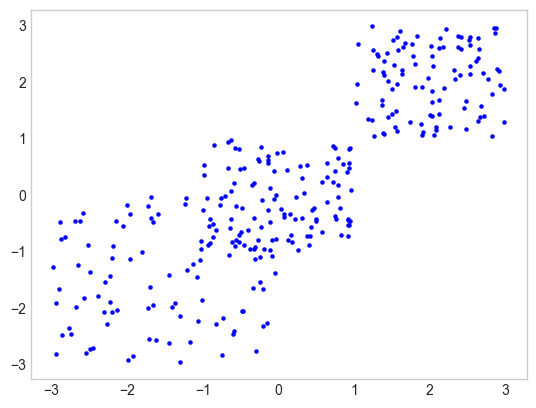

In [34]:
# Scatter plot of the data points in X
# X[:, 0] selects the first column of X (x-coordinates)
# X[:, 1] selects the second column of X (y-coordinates)
# s = 5 sets the size of the markers to 5
# c = 'b' sets the color of the markers to blue
plt.scatter(X[:, 0], X[:, 1], s=5, c='b')

# Displaying grid lines on the plot
plt.grid()

# Showing the plot
plt.show()

This give us two sets approximately centered about (-1,-1) and (2, 2). Now we are going to perform K-means clustering using the `KMeans` algorithm from scikit-learn. It creates a `KMeans` object with `n_clusters=3`, indicating that it should cluster the data into three groups. The parameter `n_init='auto'` specifies that the algorithm should automatically determine the number of initializations to perform. Finally, it fits the KMeans model to the data stored in `X`, assigning each data point to one of the three clusters.

In [36]:
# Creating a KMeans object with 3 clusters
# n_clusters=3 specifies the number of clusters to create
# n_init='auto' specifies the number of initializations to perform (automatically determined)
Kmean = KMeans(n_clusters=3, n_init='auto')

# Fitting the KMeans model to the data stored in X. The fit method of the KMeans object performs 
# the training process, where the algorithm learns the optimal cluster centroids based on the input data.
Kmean.fit(X)

KMeans(n_clusters=3, n_init='auto')

In this case, we arbitrarily gave `k` (`n_clusters`) an arbitrary value of 3. 

After the training we can start to check the results. First of all retrieve the cluster centers (centroids) calculated by the KMeans clustering algorithm. These cluster centers can be used for various purposes, such as visualizing the clusters, analyzing the characteristics of each cluster, or making predictions for new data points by assigning them to the nearest cluster center.

In [39]:
# The variable centers is assigned the result of accessing the cluster_centers_ attribute 
# of the Kmean object. This attribute stores the coordinates of the cluster centers after 
# the KMeans algorithm has been fitted to the data using the fit method.
centers = Kmean.cluster_centers_
centers

array([[-1.83946145, -1.69539379],
       [ 2.01346112,  2.02935751],
       [-0.05190165, -0.20379087]])

We can now generate a scatter plot using the data points stored in `X` and marks the cluster centers with large square markers of different colors. 

- The first scatter plot command (`plt.scatter(X[:, 0], X[:, 1], s=10, c='b')`) plots the data points in `X` with blue markers of size 10.
- The subsequent scatter plot commands plot each cluster center individually (`plt.scatter(centers[i][0], centers[i][1], s=100, c=color, marker='s')`). Each cluster center is plotted with a square marker (`marker='s'`) of size 100 and a different color (`'r'`, `'g'`, and `'y'` for red, green, and yellow, respectively).

Finally, grid lines are added to the plot, and the plot is displayed. This visualization helps in understanding the distribution of data points and the positions of the cluster centers identified by the KMeans algorithm.

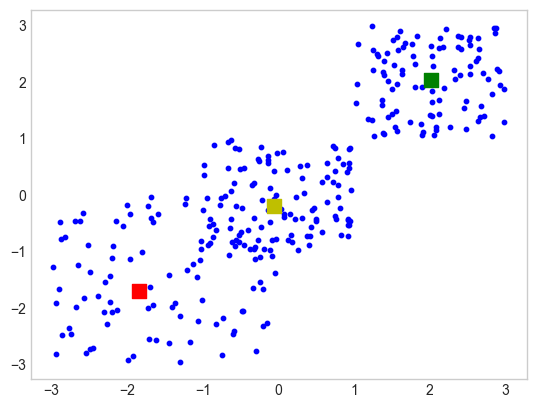

In [41]:
# Scatter plot of the data points in X
# X[:, 0] selects the first column of X (x-coordinates)
# X[:, 1] selects the second column of X (y-coordinates)
# s = 10 sets the size of the markers to 10
# c = 'b' sets the color of the markers to blue
plt.scatter(X[:, 0], X[:, 1], s=10, c='b')

# Scatter plot of the cluster centers
# centers[0][0] and centers[0][1] represent the x and y coordinates of the first cluster center
# s = 100 sets the size of the markers to 100
# c = 'r' sets the color of the markers to red
# marker='s' sets the marker shape to a square
plt.scatter(centers[0][0], centers[0][1], s=100, c='r', marker='s')

# Scatter plot of the second cluster center
# Similar parameters as above, but with different center coordinates and color
plt.scatter(centers[1][0], centers[1][1], s=100, c='g', marker='s')

# Scatter plot of the third cluster center
# Similar parameters as above, but with different center coordinates and color
plt.scatter(centers[2][0], centers[2][1], s=100, c='y', marker='s')

# Displaying grid lines on the plot
plt.grid()

# Showing the plot
plt.show()

**How Find the Right Number of Clusters**

- Determining the optimal number of clusters, often denoted as $k$, in K-means clustering is a crucial step in the process. 

- While there's no definitive method to find the exact number of clusters, finding the right number of clusters in K-means clustering involves a combination of statistical techniques, domain expertise, and subjective judgment. 

- It's essential to consider various methods and validate the results to ensure that the chosen number of clusters accurately captures the underlying patterns in the data.

**Inertia or Within Cluster Sum of Squares (WCSS)**

- A measure of the performance of the algorithm is the within cluster sum of squares also known as ***inertia***;

- For any given k the objective is to minimize inertia:
		\begin{equation}
		Inertia = \sum\limits_{i=1}^n d_i^2
		\end{equation}
		where $d_i$ is the distance of observation $i$ from its cluster center

- In practice we use the k-means algorithm with several different starting points and choose the result that has the smallest inertia 

**Elbow Method**

- Plot the within-cluster sum of squares (WCSS) against the number of clusters. 

- WCSS measures the compactness of the clusters. 

- The idea is to identify the "elbow" point in the plot, where the rate of decrease in WCSS slows down significantly. This point represents a good balance between minimizing intra-cluster distance and avoiding overfitting.

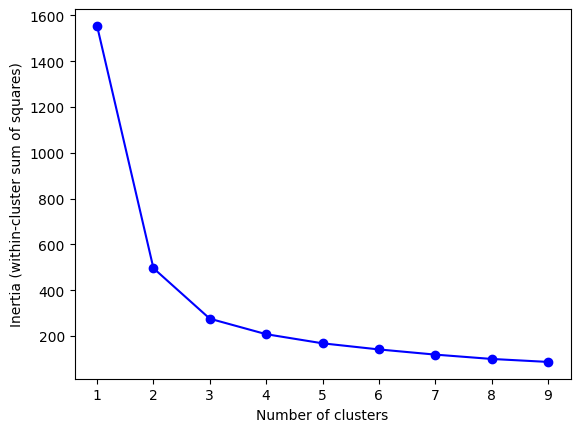

In [36]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

**Silhouette Analysis**

For each observation $i$ calculate $a(i)$, the average distance from other observations in its cluster, and $b(i)$, the average distance from observations in the closest other cluster. The silhouette score for observation $i$, $s(i)$, is defined as 
		\begin{equation}
		s(i) = \frac{b(i)-a(i)}{\max[a(i),b(i)]}
\end{equation}		   

Choose the number of clusters that maximizes the average silhouette score across all observations

Here is the code for getting the labels property of the K-means clustering example dataset; that is, how the data points are categorized into the two clusters.

In [37]:
Kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As you can see above, 50 data points belong to the 0 cluster while the rest belong to the 1 cluster.

Let’s use the code below for predicting the cluster of a data point:

In [42]:
sample_test=np.array([1.5,1.5])
second_test=sample_test.reshape(1, -1)
Kmean.predict(second_test)

array([1])

### Example 2 -  Country Risk

In [52]:
# loading packages 

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

**The Country Risk Dataset (J. C. Hull, 2019, Chapter 2)**

Consider the problem of understanding the risk of countries for foreign investment. Among the features that can be used for this are:

- GDP growth rate (IMF)
- Corruption index (Transparency international)
- Peace index (Institute for Economics and Peace)
- Legal Risk Index (Property Rights Association)

Values for each of the features for 122 countries are found in the `countryriskdata.csv` (available [here](http://www-2.rotman.utoronto.ca/~hull))   

In [53]:
if 'google.colab' in str(get_ipython()):
    from google.colab import files
    uploaded = files.upload()
    path = ''
else:
    path = './data/'

In [54]:
# load raw data
raw = pd.read_csv(os.path.join(path, 'countryriskdata.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))

Size of the dataset (row, col):  (122, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          39  1.867  3.822       3.403
1    Algeria     DZ          34  2.213  4.160       4.202
2  Argentina     AR          36  1.957  4.568      -2.298
3    Armenia     AM          33  2.218  4.126       0.208
4  Australia     AU          79  1.465  8.244       2.471


The GDP growth rate (%) is typically a positive or negative number with a magnitude less than 10. The corruption index is on a scale from 0 (highly corrupt) to 100 (no corruption). The peace index is on a scale from 1 (very peaceful) to 5 (not at all peaceful). The legal risk index runs from 0 to 10 (with high values being favorable).

**Simple exploratory analysis: Print summary statistics**

Note that all features have quite different variances, and Corruption and Legal are highly correlated.

In [55]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  122.000000  122.000000  122.000000  122.000000
mean    46.237705    2.003730    5.598861    2.372566
std     19.126397    0.447826    1.487328    3.241424
min     14.000000    1.192000    2.728000  -18.000000
25%     31.250000    1.684750    4.571750    1.432250
50%     40.000000    1.969000    5.274000    2.496000
75%     58.750000    2.280500    6.476750    4.080000
max     90.000000    3.399000    8.633000    7.958000


**Plot histogram**

Note that distributions for GDP Growth is quite skewed.

Text(0.5, 1.0, 'GDP Growth')

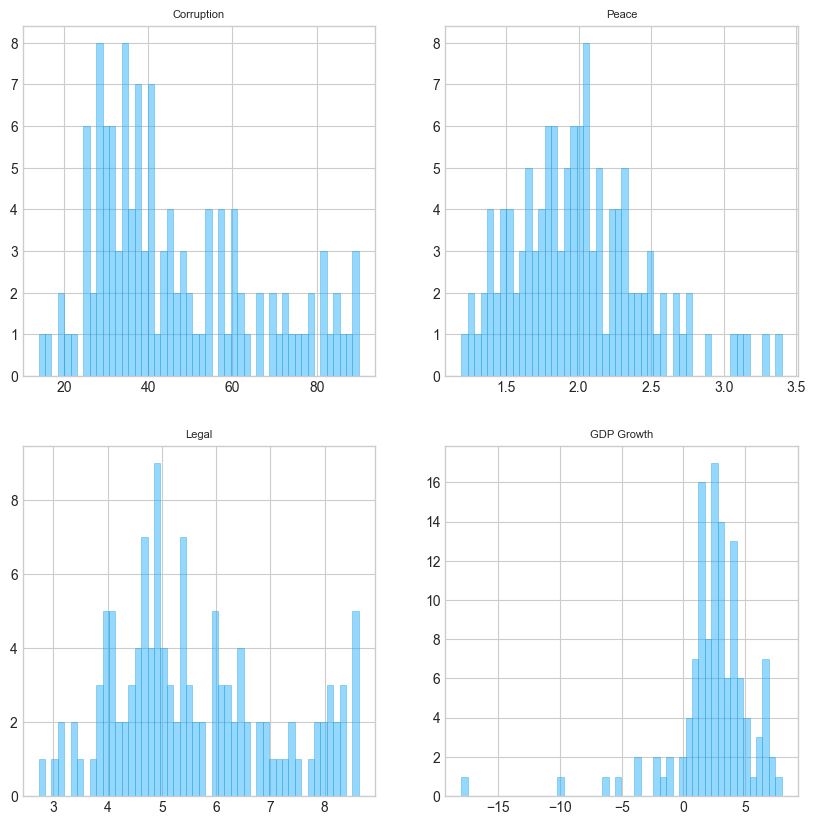

In [56]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.style.use('seaborn-whitegrid') # nice and clean grid

# Plotting on the first subplot
axs[0, 0].hist(raw['Corruption'], alpha = 0.5, bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
axs[0, 0].set_title('Corruption', size = 8)

# Plotting on the first subplot
axs[0, 1].hist(raw['Peace'], alpha = 0.5, bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
axs[0, 1].set_title('Peace', size = 8)

# Plotting on the first subplot
axs[1, 0].hist(raw['Legal'], alpha = 0.5, bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
axs[1, 0].set_title('Legal', size = 8)

# Plotting on the first subplot
axs[1, 1].hist(raw['GDP Growth'], alpha = 0.5, bins=50, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
axs[1, 1].set_title('GDP Growth', size = 8)

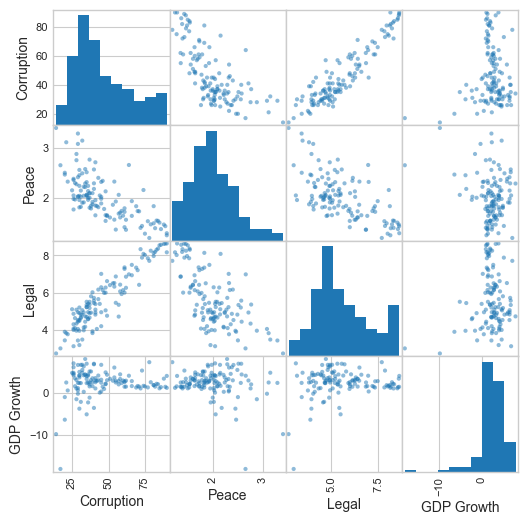

In [57]:
# Creating a scatter plot matrix
pd.plotting.scatter_matrix(raw, figsize=(6, 6))
plt.show()

In [58]:
# Calculate Pearson correlation (default)
pearson_corr = raw['Corruption'].corr(raw['Legal'])
print(f"Pearson correlation: {pearson_corr}")

Pearson correlation: 0.9235892197888613


**Features Selection and Normalization**

Since Corruption and Legal are highly correlated, we drop the Corruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.

Ref. [Feature normalization.](https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [59]:
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.305319 -1.194666    0.317896
1  0.467304 -0.967413    0.564392
2 -0.104348 -0.693096   -1.440899
3  0.478469 -0.990273   -0.667782
4 -1.202990  1.778450    0.030368


**Perform Elbow Method**

In our case, the marginal gain of adding one cluster dropped quite a bit from k=3 to k=4. We will choose k=3 (not a clear cut though).

Ref. [Determining the number of clusters in a dataset.](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set)

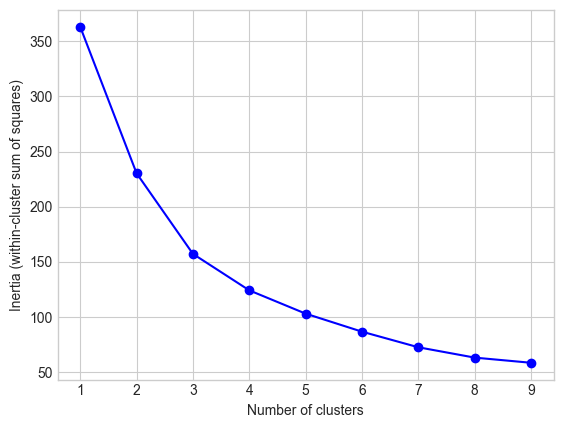

In [60]:
Ks = range(1, 10)
inertia = [KMeans(i).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()

***k*-means with k = 3**

In [61]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_, '\n')
print("cluster centers: ", kmeans.cluster_centers_, '\n')

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 157.31661757321712 

cluster centers:  [[ 2.65685249e-01 -4.51167794e-01  3.63120857e-01]
 [-9.69783061e-01  1.17216616e+00  1.73192818e-03]
 [ 1.39208980e+00 -1.04170733e+00 -1.79449174e+00]] 

cluster labels:  [0 0 2 0 1 1 2 0 0 1 0 0 0 1 2 0 2 0 1 2 1 0 0 1 0 0 1 2 1 0 2 0 0 1 0 1 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 1 1 0 2 1 0 0 0 0 0 0 1 1 1 0 2 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0 2 0 0
 0 2 1 1 1 1 2 0 2 0 0]


**Visualize the result (3D plot)**

>**NOTE** In Matplotlib, a colormap (colormap object or cmap) is a mapping from data values to colors. It is used to visually represent scalar data in plots such as scatter plots, surface plots, and heatmaps. The choice of colormap can significantly impact the interpretation and readability of the plot.
>
>Matplotlib provides various built-in colormaps, each with its own characteristics, allowing users to choose the one that best suits their data and visualization needs. Some commonly used colormaps include 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'hot', 'jet', 'rainbow', and many others.
>
>The `matplotlib.cm` module contains functions and classes related to colormaps. One of the main functions is `matplotlib.cm.get_cmap(name, lut=None)`, which retrieves a colormap by name. This function returns a colormap object that can be used to map scalar data to colors.
>
>Additionally, you can directly access specific colormaps by name without importing the `matplotlib.cm` module. For example, `cm.viridis` accesses the 'viridis' colormap, `cm.plasma` accesses the 'plasma' colormap, and so on.
>
>You can use colormaps in various plotting functions by specifying the colormap argument (`cmap`). For example, in a scatter plot, you can set `cmap='viridis'` to use the 'viridis' colormap.
>
>Colormaps are particularly useful for enhancing the visualization of data and conveying additional information through colors. However, it's essential to choose colormaps carefully to ensure that they are perceptually uniform and suitable for the specific data being visualized.

>**NOTE** The 'prism' colormap in Matplotlib is a perceptually uniform colormap designed to smoothly transition through the visible spectrum. It creates a rainbow-like effect where colors shift continuously from one end of the spectrum to the other.
>
>In the 'prism' colormap:
>
>Low values are represented by violet or blue hues.
Intermediate values are represented by a mix of colors ranging from blue to green, yellow, and orange.
High values are represented by red hues.

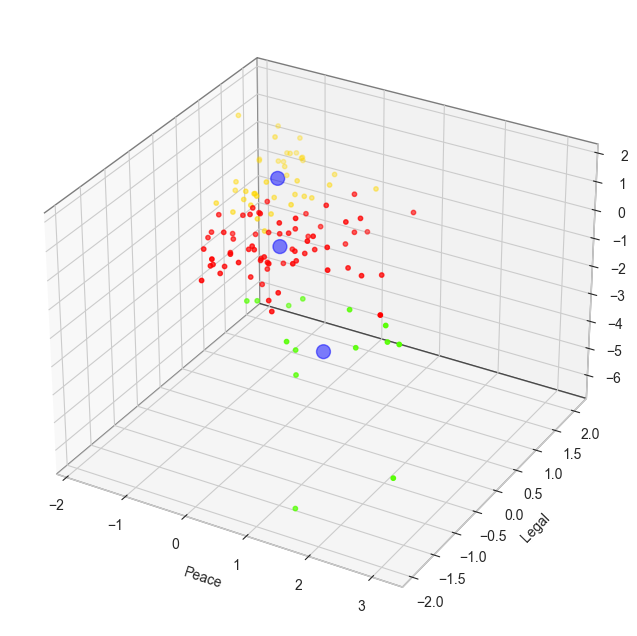

In [62]:
#
# Set up the color. The matplotlib.colors.Normalize class belongs to the matplotlib.colors module. 
# The matplotlib.colors module is used for converting color or numbers arguments to RGBA or RGB.
# This module is used for mapping numbers to colors or color specification conversion in a 1-D 
# array of colors also known as colormap. The matplotlib.colors.Normalize class is used to normalize 
# data into the interval of [0.0, 1.0].
#
norm = clrs.Normalize(vmin=0.,vmax=y.max())
#
# See https://matplotlib.org/stable/tutorials/colors/colormaps.html for choosing the appropriate color
# map for 3-D plot
#
# Setting colormap to 'prism' from the matplotlib.cm module
cmap = cm.prism

# Creating a figure object with a 3D subplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Setting edge color of the axes to black
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')

# Scatter plotting the data points in 3D space
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o', s=10)

# Retrieving and plotting cluster centers
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='blue', s=100, alpha=0.5, marker='o')

# Setting labels for each axis
ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

# Displaying the plot
plt.show()

**Visualize the result (3 2D plots)**

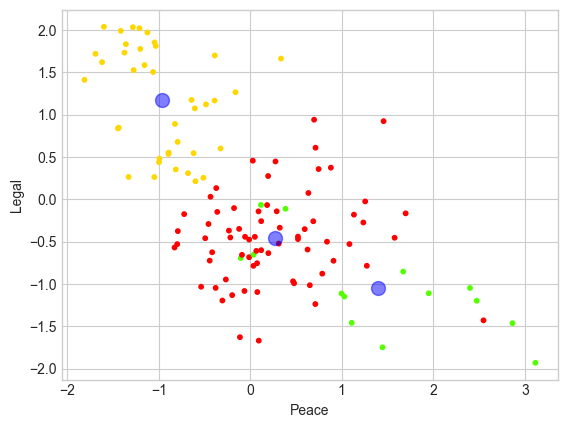

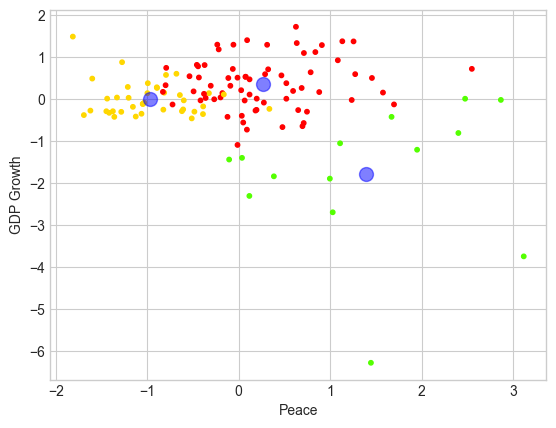

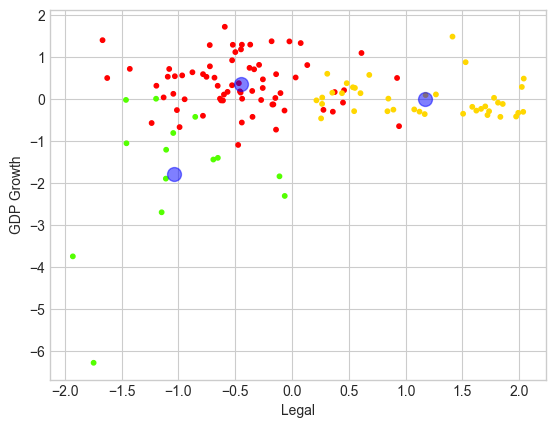

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i)
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=10)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='blue', s=100, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

**Visualize the result (3 2D plots)**

plot country abbreviations instead of dots.

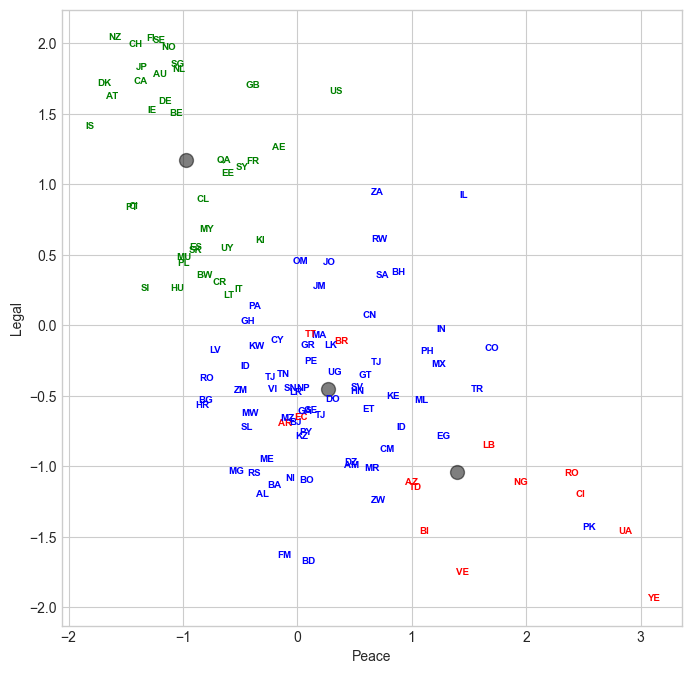

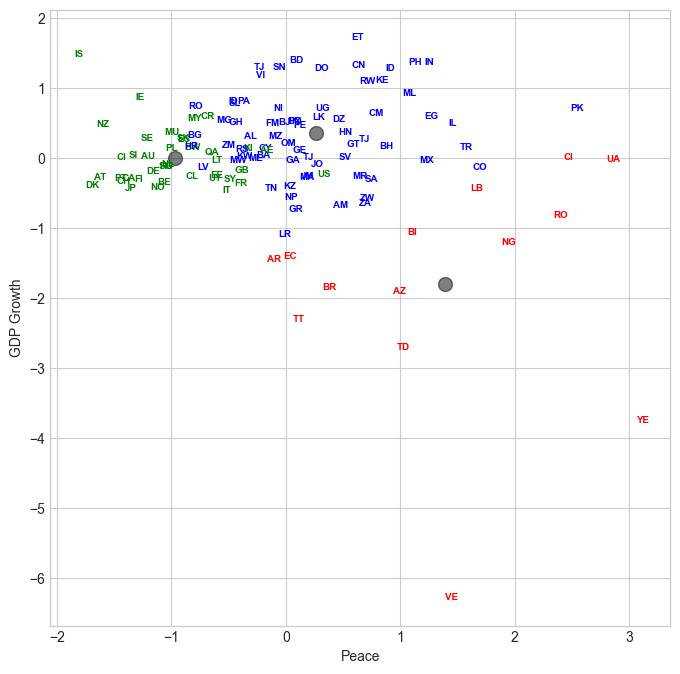

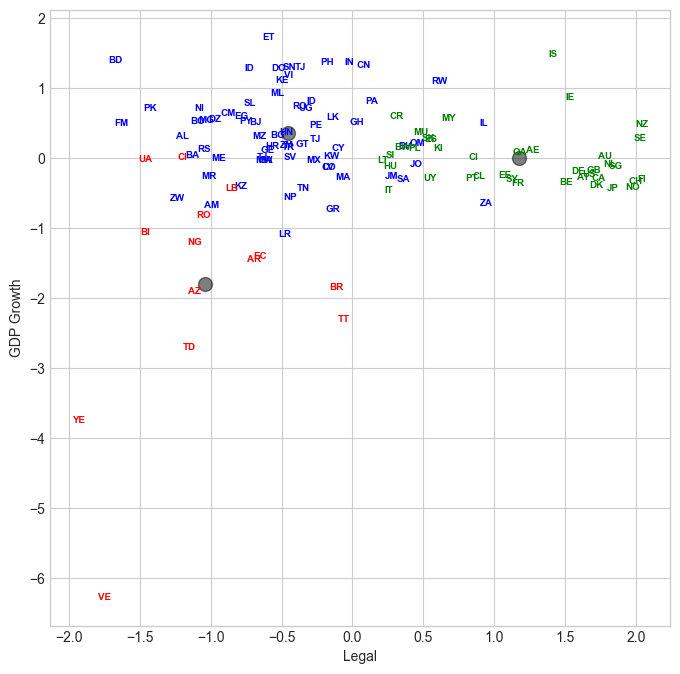

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(8, 8))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=100, alpha=0.5)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='semibold', horizontalalignment = 'center', verticalalignment = 'center', size=7)
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

**List the result**

In [65]:
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country Abbrev  Label
0                         Albania     AL      0
73                     Mozambique     MZ      0
72                        Morocco     MA      0
71                     Montenegro     ME      0
70                        Moldova     FM      0
69                         Mexico     MX      0
67                     Mauritania     MR      0
66                           Mali     ML      0
64                         Malawi     MW      0
63                     Madagascar     MG      0
61                        Liberia     LR      0
120                        Zambia     ZM      0
59                         Latvia     LV      0
58                         Kuwait     KW      0
56                          Kenya     KE      0
55                     Kazakhstan     KZ      0
54                         Jordan     JO      0
52                        Jamaica     JM      0
50                         Israel     IL      0
48                           Iran     ID

**Perform Silhouette Analysis**

Next cell code performs silhouette analysis to determine the optimal number of clusters for KMeans clustering. Here's a description:

- **Range of Clusters**: The `range_n_clusters` list contains a range of candidate numbers of clusters to evaluate. This range is typically chosen based on domain knowledge or heuristic methods.

- **Silhouette Scores**: The `silhouette` list is initialized to store silhouette scores corresponding to each number of clusters.

- **Loop**: The code iterates through each candidate number of clusters.

- **KMeans Clustering**: For each iteration, a `KMeans` object is created with the specified number of clusters.

- **Clustering Data**: The `fit_predict` method is used to assign each data point to a cluster and obtain cluster labels.

- **Silhouette Score Calculation**: The `silhouette_score` function calculates the average silhouette score for the current clustering configuration.

- **Storing Scores**: The silhouette score is appended to the `silhouette` list.

- **Optional Printing**: Optionally, you can uncomment the print statement to display the silhouette score for each number of clusters.

By analyzing the silhouette scores for different numbers of clusters, you can determine the optimal number of clusters that best capture the underlying structure of the data.

In [69]:
# List of candidate numbers of clusters for silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# List to store silhouette scores corresponding to each number of clusters
silhouette = []

# Iterating through each candidate number of clusters
for n_clusters in range_n_clusters:
    # Creating a KMeans object with a specific number of clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    # Assigning each data point to a cluster and obtaining cluster labels
    cluster_labels = clusterer.fit_predict(X)
    # Calculating the average silhouette score for the current clustering
    silhouette_avg = silhouette_score(X, cluster_labels)
    # Appending the silhouette score to the list
    silhouette.append(silhouette_avg)
    # Optional: Printing the silhouette score for each number of clusters
    #print("For n_clusters=", n_clusters, "The average silhouette_score is :", silhouette_avg)

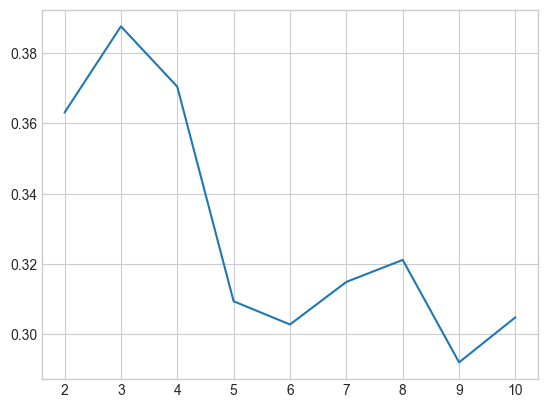

In [70]:
plt.plot(range_n_clusters, silhouette)

## Hierarchical Clustering

**Definition**

- Hierarchical clustering algorithms are a family of algorithms used in machine learning for grouping data points into a hierarchy of clusters. 

- These algorithms build a hierarchy of clusters either by starting with individual data points and successively merging them (**agglomerative approach**) or by beginning with the entire data set and successively dividing it into smaller clusters (**divisive approach**). 

- The process creates a tree-like structure known as a **dendrogram**, which illustrates how individual elements are grouped into clusters.

**Key Characteristics of Hierarchical Clustering:**

1. **Agglomerative Approach**: This is the more commonly used method in hierarchical clustering. It starts by treating each data point as a single cluster. Then, iteratively, the closest pairs of clusters are merged, creating a hierarchy from the bottom up. The process continues until all points are merged into a single cluster, or a stopping criterion is met.

2. **Divisive Approach**: In contrast, divisive methods start with the entire dataset as one large cluster and then partition it into smaller clusters. This partitioning continues recursively, leading to finer and more specific clusters, until each data point is in its own cluster or a stopping criterion is reached.

3. **Creating a Dendrogram**: Both approaches produce a dendrogram, a tree-like diagram that records the sequences of merges or splits. The height at which two clusters are joined in the dendrogram represents the distance between these clusters, providing valuable insights into the data structure.

4. **Distance Metrics and Linkage Criteria**: The choice of distance metric (e.g., Euclidean, Manhattan) and linkage criterion (e.g., single linkage, complete linkage, average linkage, see below for a description) plays a crucial role in hierarchical clustering. These determine how the similarity between clusters is calculated and directly influence the clustering outcome.

**Linkage Criterion**

The linkage criterion determines the distance between sets of observations as a function of the pairwise distances between observations. It's a rule used to decide when to combine two clusters into a single cluster as the algorithm progresses either bottom-up (agglomerative) or top-down (divisive). Here are the most common types of linkage criteria:

1. **Single Linkage (Nearest Point Algorithm)**: The distance between two clusters is defined as the shortest distance between any single member of one cluster and any single member of the other cluster. This can result in a chaining effect, where clusters end up being long and straggly.

2. **Complete Linkage (Farthest Point Algorithm)**: The distance between two clusters is defined as the longest distance between any single member of one cluster and any single member of the other cluster. This tends to produce more compact, tightly bound clusters.

3. **Average Linkage (Average of Pairs)**: The distance between two clusters is computed as the average distance between all pairs of individuals in the two clusters. This creates a balance between the single and complete linkage criteria and is less affected by outliers than either.

4. **Centroid Linkage (Minimum Centroid Distance)**: The distance between two clusters is the distance between their centroids - that is, the mean point of each cluster. Clusters are merged based on the proximity of their centroids.

5. **Ward’s Method (Minimum Variance Method)**: This approach aims to minimize the total within-cluster variance. At each step, the pair of clusters with the minimum between-cluster distance are merged. This method tends to create clusters of roughly equal size, which is useful in some contexts but not all.

The choice of linkage criterion can significantly affect the shape and the size of the clusters formed by hierarchical clustering, and it should be chosen based on the nature of the data and the desired clustering resolution.

**The Distance Matrix**

- The distance matrix, also known as a dissimilarity matrix, is a table that shows the distance between each pair of objects in a dataset. Each element $(i, j)$ in the matrix represents the distance between the $i$th and $j$th elements of the dataset. The choice of distance metric (like Euclidean, Manhattan, etc.) depends on the type of data and the specific requirements of the analysis.

- For a dataset with $N$ objects, the distance matrix is an $N \times N$ table where the diagonal elements are zeros because the distance between any object and itself is zero. The matrix is symmetric because the distance from object $i$ to object $j$ is the same as from object $j$ to object $i$.

- When used in hierarchical clustering, this matrix serves as a fundamental component in the algorithm's iterative process of clustering objects. 

- At each step, the algorithm consults the distance matrix to determine which objects or clusters are closest to each other and should be merged. 

- After each merging step, the distance matrix is updated to reflect the distances between the new clusters and the remaining objects or clusters. 

- The distance matrix is crucial because it encapsulates the entire pairwise dissimilarities within the dataset, allowing the hierarchical clustering algorithm to systematically organize the data into a dendrogram, which visually represents the cluster hierarchy.

**Example of Computation of a Distance Matrix**

In [72]:
import pandas as pd
import numpy as np

# Sets the seed for numpy's random number generator to 123, which ensures that the random numbers 
# generated can be reproduced. In other words, every time the code is run with this seed, the 
# same set of random numbers will be generated, which is useful for debugging or sharing the 
# code with others to ensure consistent results.
np.random.seed(123)
# create a list of strings that represent the names of the variables (or features) for the dataset. 
# There will be three variables named 'X', 'Y', and 'Z'.
variables = ['X', 'Y', 'Z']
#  create a list of strings that are used as labels or identifiers for the data points. There will 
# be five data points, labeled from 'ID_0' to 'ID_4'.
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
# generate a 5x3 array of random floating-point numbers drawn from a uniform distribution in the 
# semi-open interval [0.0, 1.0). Each number is then multiplied by 10, changing the range to [0.0, 10.0). 
# The array has 5 rows and 3 columns, corresponding to the five data points and three variables.
X = np.random.random_sample([5, 3])*10
# This line creates a pandas DataFrame from the array X, with the specified column names from the 
# variables list and row labels from the labels list. The DataFrame df is a tabular data structure 
# with labeled axes (rows and columns).
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


In [73]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Computing the distance matrix
distance_matrix = pd.DataFrame(
    squareform(pdist(df, metric='euclidean')),
    columns=df.index,
    index=df.index
)

distance_matrix


,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


**Linkage**

The `linkage` function in the `scipy.cluster.hierarchy` module is used to perform hierarchical/agglomerative clustering. It takes a dataset and builds a hierarchical clustering using a bottom-up approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.

Here's a description of the main components of the `linkage` function:

1. **Input Data**: The function can take an array of shape (n, m) as input, where n is the number of observations and m is the number of features. It can also take a condensed distance matrix, which is a one-dimensional array containing the upper triangular of the distance matrix (since it's symmetric).

2. **Method**: The `method` parameter specifies the linkage algorithm to use when merging clusters. Common methods include:
   - `'single'`: Nearest point algorithm, where the distance between two clusters is the minimum of all pairwise distances.
   - `'complete'`: Farthest point algorithm, where the distance between two clusters is the maximum of all pairwise distances.
   - `'average'`: Average of all pairwise distances.
   - `'centroid'`: Distance between the centroids of the clusters.
   - `'ward'`: Ward’s method, which minimizes the variance within each cluster.

3. **Metric**: The `metric` parameter specifies the distance metric to use for computing the distance between observations. Common metrics include:
   - `'euclidean'`: Straight line distance between points.
   - `'cityblock'` or `'manhattan'`: Sum of absolute differences in their coordinates.
   - And many others, including `'minkowski'`, `'hamming'`, `'cosine'`, etc.

4. **Output**: The output of the `linkage` function is a linkage matrix. This matrix provides information about the hierarchical clustering structure. Each row represents a merge operation, with the following columns:
   - The first and second columns each contain the indices of the clusters that were merged.
   - The third column is the distance between the merged clusters.
   - The fourth column is the number of original observations in the newly formed cluster.

This linkage matrix can then be used to create a dendrogram, which is a tree-like diagram that shows the order of merges and the distance at which each merge occurred.

Here's a simple usage of the `linkage` function:

```python
from scipy.cluster.hierarchy import linkage

# Assuming `data` is a 2D array or a condensed distance matrix
Z = linkage(data, method='complete', metric='euclidean')
```

`Z` is the linkage matrix that you can use to plot a dendrogram or cut the tree into clusters at a given distance.

### A Simple Example with Synthetic Data

In [77]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generating synthetic data. Calls the make_blobs function to generate synthetic data.
# - n_samples=50: Specifies the number of data points to generate.
# - n_features=2: Specifies the number of features (dimensions) for each data point. In this case, it generates 2D data.
# - centers=3: Specifies the number of clusters to generate.
# - cluster_std=0.60: Specifies the standard deviation of the clusters. Higher values indicate more spread-out clusters.
# - random_state=0: Sets the random seed for reproducibility. This ensures that the generated data will be the same each time the code is run.
X, _ = make_blobs(n_samples=50, n_features=2, centers=3, cluster_std=0.60, random_state=0)

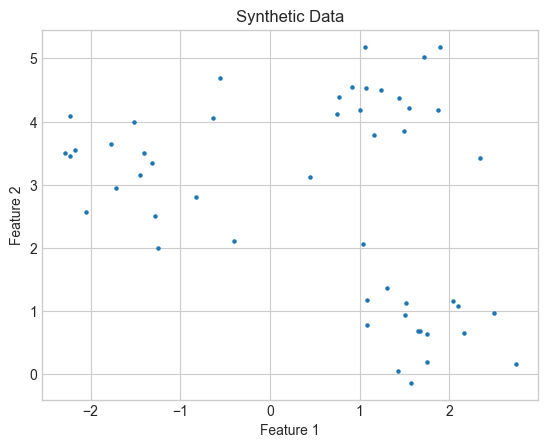

In [78]:
# Visualizing the data
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

**Agglomerative Clustering with Scikit-Learn**

The `AgglomerativeClustering` function in scikit-learn is an implementation of hierarchical agglomerative clustering, which is a type of clustering algorithm that builds a hierarchy of clusters. Here's a description of the function:

1. **Initialization**: 
   - The `AgglomerativeClustering` function is initialized with parameters specifying the desired number of clusters or specifying linkage criteria (e.g., "ward", "complete", "average", or "single") and the distance metric to use (e.g., "euclidean", "manhattan", "cosine", etc.).
   - Parameters:
     - `n_clusters`: Specifies the number of clusters to form.
     - `linkage`: Specifies the linkage criterion to use. It determines the distance between newly formed clusters. Options include "ward", "complete", "average", and "single".
     - `affinity`: Specifies the distance metric to use. It is required if `linkage` is not "ward".

2. **Fitting the Model**:
   - The `fit` method is called on the initialized `AgglomerativeClustering` object to fit the model to the data.
   - Parameters:
     - `X`: The input data to be clustered.

3. **Clustering**:
   - The algorithm iteratively merges the 
   closest clusters based on the chosen linkage criterion and distance metric until the specified number of clusters is reached or until a stop condition is met.
   - At each step, it calculates the pairwise distances between clusters using the chosen distance metric and merges the closest clusters into larger clusters.
   - This process continues until the desired number of clusters is reached, resulting in a dendrogram or hierarchy of clusters.

4. **Predicting Cluster Assignments**:
   - After fitting the model, cluster assignments for the input data can be obtained using the `labels_` attribute.

**fit_predict vs fit AND predict**

In scikit-learn, both the `fit_predict` method and the combination of `fit` and `predict` methods are used for training models and making predictions. Here's an explanation of each method and their differences:

1. **fit_predict**:
   - The `fit_predict` method combines the training (fitting) and prediction steps into a single operation.
   - When calling `fit_predict`, the algorithm is first fitted to the training data, learning the underlying patterns and structure of the data.
   - After fitting, the algorithm immediately assigns each data point to a cluster, generating cluster labels as predictions.
   - This method is commonly used in clustering algorithms, where the primary goal is to both learn the clusters from the data and assign cluster labels to each data point simultaneously.

2. **fit and predict**:
   - The `fit` method is used to train the model on the training data. During this step, the algorithm learns the patterns and structure of the data.
   - The `predict` method is then used to make predictions on new, unseen data. This method takes the trained model and applies it to the new data, generating predictions based on the learned patterns.
   - In the context of clustering, `fit` is used to learn the clusters from the data, while `predict` is not typically used since clustering algorithms usually assign cluster labels during training and not on new, unseen data.

**Key Differences**:
- **Usage**: `fit_predict` is used for clustering algorithms to both learn the clusters and assign cluster labels to the training data, while `fit` and `predict` are used separately for supervised learning tasks where predictions are made on new, unseen data.
- **Output**: `fit_predict` directly outputs cluster labels for the training data, whereas `fit` and `predict` separately perform training and prediction steps, respectively.
- **Convenience**: `fit_predict` can be more convenient when using clustering algorithms, as it combines both steps into a single call. However, `fit` and `predict` provide more flexibility, allowing for separate training and prediction phases.

In summary, `fit_predict` is specific to clustering algorithms and provides a convenient way to both train the model and generate cluster labels simultaneously. On the other hand, `fit` and `predict` are used separately for training and prediction in supervised learning tasks.

In [90]:
from sklearn.cluster import AgglomerativeClustering

# Performing hierarchical clustering
hc   = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

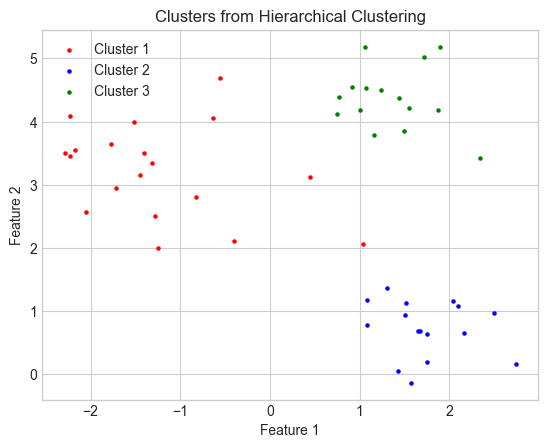

In [91]:
# Visualizing the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=5, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=5, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=5, c='green', label='Cluster 3')
plt.title("Clusters from Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating the linkage matrix
Z = linkage(X, 'ward')

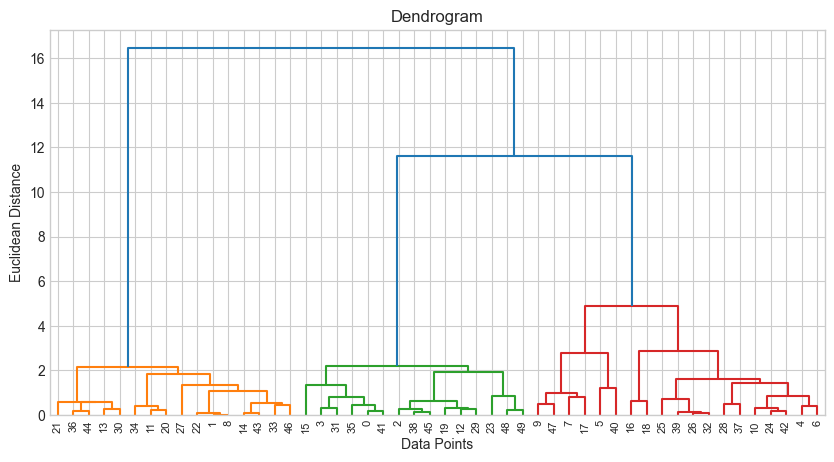

In [89]:
# Plotting the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Advantages of Hierarchical Clustering:**

- **No Need to Specify Number of Clusters**: Unlike K-means, hierarchical clustering does not require the user to specify the number of clusters beforehand.

- **Flexibility and Richness**: The hierarchical structure offers a more nuanced view of the data, as it captures relationships at different levels.

- **Easy to Interpret**: The dendrogram provides an intuitive and visual representation of the clustering process and data structure.

**Challenges and Limitations:**

- **Computational Complexity**: Especially for agglomerative methods, the computational complexity can be quite high for large datasets, making them less scalable than other clustering methods like K-means.

- **Sensitivity to Noise and Outliers**: Hierarchical clustering can be sensitive to noise and outliers, which can lead to misinterpretations of the data structure.

- **Irreversibility**: Once a step (merge or split) is done, it cannot be undone in later iterations, which might lead to suboptimal clustering in some cases.

Hierarchical clustering is widely used in various fields like bioinformatics for gene expression analysis, in marketing for customer segmentation, and in document clustering for information retrieval. Its intuitive approach and the detailed insight it provides into the data structure make it a valuable tool in the unsupervised learning toolkit.

## DBSCAN

**Definition**

DBSCAN, which stands for Density-Based Spatial Clustering of Applications with Noise, is a popular clustering algorithm used in machine learning. It is a density-based clustering algorithm because it forms clusters based on dense regions of points. Here's an overview of how DBSCAN works:

1. **Core Points**: DBSCAN begins by identifying "core points," which are points that have at least a minimum number of other points (MinPts) within a certain radius (ε, epsilon). This radius can be thought of as a circle (or sphere in higher dimensions) drawn around each data point.

2. **Clusters**: Clusters are formed by connecting core points that are within ε distance of each other. If a core point is within this distance of another core point, they are part of the same cluster. This process continues until all core points are connected to clusters.

3. **Border Points**: There are also "border points," which are not core points (since they have fewer than MinPts within their ε neighborhood) but are within the ε radius of a core point and hence are included in the cluster.

4. **Noise**: Any point that is not a core point or a border point is considered "noise" and is not included in any cluster. This makes DBSCAN particularly good at handling outliers.

DBSCAN has several advantages:

- It does not require specifying the number of clusters in advance, unlike K-means.
- It can find arbitrarily shaped clusters.
- It has a notion of noise and is thus robust to outliers.

However, DBSCAN also has its drawbacks:

- It can struggle with datasets where clusters vary widely in density.
- Choosing the right ε and MinPts can be difficult without domain knowledge or some parameter tuning strategy.

DBSCAN is a powerful clustering algorithm when you have spatial data with clusters of similar density and you need an algorithm that can handle noise and outliers.

The following code demonstrates the generation and visualization of synthetic moon-shaped data using scikit-learn's `make_moons` function and Matplotlib for plotting. Here's a breakdown of the code:

1. **Importing Libraries**:
   - `from sklearn.datasets import make_moons`: Imports the `make_moons` function from scikit-learn's `datasets` module. This function is used to generate synthetic data with moon-shaped clusters.
   - `import matplotlib.pyplot as plt`: Imports the Matplotlib library for plotting.

2. **Generating Synthetic Data**:
   - `X, y = make_moons(n_samples=200, noise=0.05, random_state=0)`: Calls the `make_moons` function to generate synthetic moon-shaped data.
     - `n_samples=200`: Specifies the number of data points to generate.
     - `noise=0.05`: Specifies the standard deviation of the Gaussian noise added to the data. Higher values result in noisier data.
     - `random_state=0`: Sets the random seed for reproducibility. This ensures that the generated data will be the same each time the code is run.
   - The generated data consists of two arrays:
     - `X`: An array of shape `(n_samples, 2)` containing the coordinates of the data points.
     - `y`: An array of shape `(n_samples,)` containing the labels of the data points (not used in this visualization).

3. **Visualizing the Data**:
   - `plt.scatter(X[:, 0], X[:, 1], s= 10)`: Creates a scatter plot of the synthetic data.
     - `X[:, 0]` and `X[:, 1]` represent the first and second features (columns) of the generated data, respectively.
     - `s=10`: Sets the size of the points in the scatter plot to 10 (small).
   - `plt.tight_layout()`: Adjusts the layout of the plot to prevent overlapping elements.
   - `plt.show()`: Displays the plot.

In [95]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

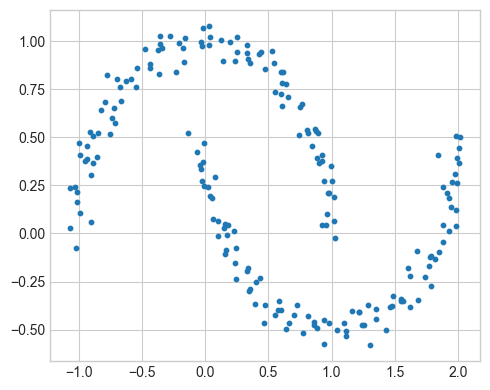

In [98]:
plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], s= 10)
plt.tight_layout()
plt.show()

Now we are ready to use the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm for clustering and visualizing the resulting clusters.

In [99]:
from sklearn.cluster import DBSCAN

'''
creates an instance of the DBSCAN class with specific parameters:

- eps         = 0.2        : This sets the neighborhood radius (epsilon) to 0.2. Points within this distance are 
                             considered neighbors.
- min_samples = 5          : This sets the minimum number of points required to form a dense region (core points) to 5.
- metric      = 'euclidean': The distance metric for measuring the distance between points is Euclidean distance.
'''
db = DBSCAN(eps         = 0.2,
            min_samples = 5,
            metric      = 'euclidean')
'''
The fit_predict method performs clustering on the dataset X and returns an array y_db that contains 
cluster labels for each point in X. Points labeled with the same number belong to the same cluster, 
while points labeled as -1 are considered noise
'''
y_db = db.fit_predict(X)


The remaining code uses matplotlib's `plt.scatter` to plot the points in the dataset `X`. It visualizes the clusters 
identified by DBSCAN:

- The first `plt.scatter` call plots the points belonging to the first cluster `(y_db == 0)`. 
  These points are colored light blue, with circle markers (`'o'`), black edges, and size `40`.

- The second `plt.scatter` call plots the points belonging to the second cluster `(y_db == 1)`. 
  These are shown in red, with square markers (`'s'`), black edges, and size `40`.

- `plt.legend()` adds a legend to the plot.

- `plt.tight_layout()` adjusts the plot layout for better readability.

- `plt.show()` displays the plot.

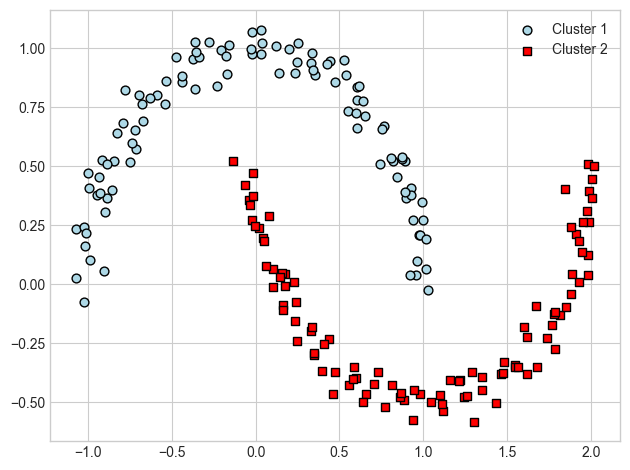

In [102]:
plt.scatter(X[y_db==0, 0],X[y_db==0, 1],c='lightblue',edgecolor='black',marker='o',s=40,label='Cluster 1')
plt.scatter(X[y_db==1, 0],X[y_db==1, 1],c='red',edgecolor='black',marker='s',s= 40,label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

## References and Credits

[1] - Irani J. et al. - ["Clustering Techniques and the Similarity Measures used in Clustering: A Survey"](https://www.ijcaonline.org/research/volume134/number7/irani-2016-ijca-907841.pdf), *International Journal of Computer Applications (0975 – 8887), Volume 134 – No.7, January 2016.*

[2] - Hull J. C. - "Machine Learning in Business: An Introduction to the World of Data Science", Amazon, 2019.

Other Usefull link:

[Equivalent of Elbow Method](https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method)


